AML cell classificaion in FA samples

In [116]:
##Libraries

import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
#from sklearn.manifold import TSNE
from keras.optimizers import Adam
from sklearn.decomposition import PCA
from keras.models import Sequential, Model
#from umap import UMAP
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.metrics import classification_report,confusion_matrix
import pandas as pd
from collections import Counter
import numpy as np
import ast
import scanpy as sc
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import SVC
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
%reload_ext jupyternotify

<IPython.core.display.Javascript object>

In [164]:
##Directories
    
    #Rodríguez
dir_Rod_FA = "E:/AML_project/DATASETS/Rodriguez/pacientes/genecounts/"

    #Colla
dir_Co_DC = "E:/AML_project/DATASETS/Colla/pacientes/genecounts/"

    #Training dataset
dir_train = "E:/AML_project/DATASETS/training/"

    #Intersecting genes
dir_genes = "E:/AML_project/METADATA/"

    #Predictions
dir_predictions = "E:/AML_project/DATASETS/predictions/separate/"

#Combination of datasets

# comb = "RvG"
# comb = "RGG"
# comb = "CovG"
comb = "CoGG"

Model construction and training (pre-saved training dataser)

In [165]:
##Loading training dataset (Building.ipynb)

Xtrain = np.load(dir_train + "Xtrain_" + comb + ".npy")
ytrain = np.load(dir_train + "ytrain_" + comb + ".npy")
Xtest = np.load(dir_train + "Xtest_" + comb + ".npy")
ytest = np.load(dir_train + "ytest_" + comb + ".npy")

In [166]:
##Model construction and training (with pre-saved dataset)

    #Defining data shape for model input
genes = Xtrain.shape[1]
Xtrain.shape

    #Defining shape of the first layer (tensor) which corresponds to the input
n_input = genes #shape of the initial matrix (number of genes)
n_dim=2 #number of dimensions of the dataset

    #Building the model
model = Sequential()
model.add(Dense(1000,       activation='sigmoid', input_shape=(genes,))) #input size must be the genes measured and the first layer size the cells 
model.add(Dense(800,       activation='sigmoid'))
model.add(Dense(50,       activation='sigmoid'))
model.add(Dense(n_dim,    activation='softmax')) #last layer must only have size of the number of dimensions of the dataset (2)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(), metrics=["accuracy"]) #compiling the model 
                                                                                                    #optimizer Adam adapts by itself the learning rate

    #Training the model
model.fit(Xtrain,ytrain, batch_size = 120, epochs = 8, verbose = 1) #batch_size= number of samples are included in one batch to be processed in one time (X)
                                                                     #epochs= number of times the model repeats the training with all the data (incresing accuracy)
                                                                     #verbose=  allowing to see output messsages from the model while running (0 = none, 1, 2 = all)

Epoch 1/8
73/73 [==============================] - 3s 43ms/step - loss: 0.4009 - accuracy: 0.8412
Epoch 2/8
73/73 [==============================] - 3s 43ms/step - loss: 0.0477 - accuracy: 0.9990
Epoch 3/8
73/73 [==============================] - 3s 44ms/step - loss: 0.0071 - accuracy: 0.9998
Epoch 4/8
73/73 [==============================] - 3s 43ms/step - loss: 0.0042 - accuracy: 0.9999
Epoch 5/8
73/73 [==============================] - 3s 43ms/step - loss: 0.0027 - accuracy: 0.9999
Epoch 6/8
73/73 [==============================] - 3s 41ms/step - loss: 0.0022 - accuracy: 0.9999
Epoch 7/8
73/73 [==============================] - 3s 42ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 8/8
73/73 [==============================] - 3s 41ms/step - loss: 0.0017 - accuracy: 0.9999


68/68 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1844
           1       0.99      1.00      1.00       324

    accuracy                           1.00      2168
   macro avg       1.00      1.00      1.00      2168
weighted avg       1.00      1.00      1.00      2168

[[1842    2]
 [   0  324]]


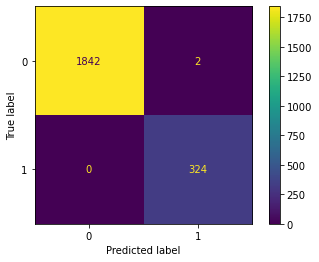

In [167]:
##Model re-testing and re-evaluation with test data (optional)

    #Testing the model with the test data
predictions=model.predict(Xtest)

    #Obtaining list of predictions for each sample (probabilities for each class)
pred_label=[]
for p in predictions:  #list of probabilities for being malignant (1) or non-mmalignant (0) based on the model
    pred_label.append(np.argmax(p)) #ronding list of probabilities to the predicted class (1 or 0)

    #Verifying how accurate was the model, comparing the prediction of the test data with the actual classification
print(classification_report(ytest, pred_label)) 
print(confusion_matrix(ytest, pred_label)) #Matrix that compares the predicted labels with the true labels
ConfusionMatrixDisplay.from_predictions(ytest, pred_label) #Turning the martix into a plot
                                                                #X-axis true labels
                                                                #Y-axis predicted labels
plt.show()

Model Prediction (FA dataset)

    Parsing Data

        -Rodríguez

In [154]:
##Rodríguez 

    #Patients
file_dir_FA = []
file_names_FA = []
sample_names_FA = []

for i in os.listdir(dir_Rod_FA):
    path = os.path.join(dir_Rod_FA,i)
    name = i.replace(".csv","")
    file_dir_FA.append(path)
    file_names_FA.append(i)
    sample_names_FA.append(name)

        -Colla

In [168]:
##Colla

    #Patients
file_dir_Co = []
file_names_Co = []
sample_names_Co = []

for i in os.listdir(dir_Co_DC):
    path = os.path.join(dir_Co_DC,i)
    name = i.replace(".csv.gz","")
    name = name[11:]
    file_dir_Co.append(path)
    file_names_Co.append(i)
    sample_names_Co.append(name)

    Loading data

In [169]:
##Gene metadata
gene_list = open(dir_genes + "gene_list_"+ comb + ".txt", 'r')
gene_list = gene_list.read()
gene_list = ast.literal_eval(gene_list)
shared_genes = np.array(gene_list)

        Rodríguez

In [70]:
##Rodríguez
for n in range(0, len(file_dir_FA)):
    sample_names_FA[n] = pd.read_csv(file_dir_FA[n], sep='\t') #Read file
    sample_names_FA[n] = sample_names_FA[n].add_suffix("_FA")
    sample_names_FA[n] = sample_names_FA[n].rename({'Gene_FA': 'Gene'}, axis=1) #Rename gene column

        Colla

In [170]:
##Colla
patients = ["1","2","3","4"]
for n in range(0, len(file_dir_Co)):
    sample_names_Co[n] = pd.read_csv(file_dir_Co[n]) #Read file
    df_DC = pd.read_csv('E:/AML_project/DATASETS/Colla/genelist_DC.csv') #read file
    genes_DC = df_DC['Gene'].to_list() #generate list of the genes
    sample_names_Co[n]['Gene'] = genes_DC #change gene IDs to gene names (previously obtained)
    sample_names_Co[n] = sample_names_Co[n].drop_duplicates(['Gene']) #Eliminating gene duplicates (only Ganan-Gómez data has them)
    sample_names_Co[n] = sample_names_Co[n].add_suffix("_Patient_" + patients[n] + "_DC")
    sample_names_Co[n] = sample_names_Co[n].rename({'Gene_Patient_' + patients[n] + '_DC': 'Gene'}, axis=1) #Rename gene column
    del sample_names_Co[n]['Unnamed: 0_Patient_' + patients[n] + '_DC'] #remove column with gene IDs 

    Sampling and annotating data

In [171]:
    #Generate empty dataframe as template to merge others
data = []
all_samples = pd.DataFrame(data,index = gene_list)

        -Rodríguez

In [72]:
##Rodríguez

    #Sampling intersecting genes
    
for n in range(0, len(file_dir_FA)):
#Select only genes found in the intersection and create gene(row) and cell(column) dataframe
    gene_num_FA = [i for i, x in enumerate(sample_names_FA[n]['Gene']) if x in gene_list] #selecting row numbers of the genes found in the intersection
    df_inter = sample_names_FA[n].iloc[gene_num_FA] #create dataframe with only the row numbers of the genes found in the intersection
    sample_names_FA[n] = df_inter.sort_values('Gene') #sort gene rows alphabetically to match vanGalen format
    sample_names_FA[n].index = gene_list #changing index to gene names (alphabetically ordered) to match vGa data frame indexes
    sample_names_FA[n]= sample_names_FA[n].drop('Gene', axis=1) #remove gene column
    
    #Merging all files
    
    all_samples = pd.concat((all_samples, sample_names_FA[n]), axis = 1) #append all dataframes into the van Galen merge

    #Show summary of the amount of cells per celltype and class
    # print("The sample has:")
    # print(Counter(annohealthy1.PredictionRefined)) #print number of cells in class
    # print(Counter(annohealthy1.CellType)) #print number of cells in each celltype
    
#Generate list with cell IDs
# all_samples.index = gene_num_FA
barcodes_general = all_samples.columns.values.tolist()

        -Colla

In [172]:
##Colla

#Sampling intersecting genes

for n in range(0, len(file_dir_Co)):
#Select only genes found in the intersection and create gene(row) and cell(column) dataframe
    gene_num_Co = [i for i, x in enumerate(sample_names_Co[n]['Gene']) if x in gene_list] #selecting row numbers of the genes found in the intersection
    df_inter = sample_names_Co[n].iloc[gene_num_Co] #create dataframe with only the row numbers of the genes found in the intersection
    sample_names_Co[n] = df_inter.sort_values('Gene') #sort gene rows alphabetically to match vanGalen format
    sample_names_Co[n].index = gene_list #changing index to gene names (alphabetically ordered) to match vGa data frame indexes
    sample_names_Co[n]= sample_names_Co[n].drop('Gene', axis=1) #remove gene column
    
#Merging all files
    all_samples = pd.merge(all_samples, sample_names_Co[n], left_index=True, right_index=True, suffixes=('', '_drop')) #append all dataframes into the van Galen merge
all_samples.drop([col for col in all_samples.columns if 'drop' in col], axis=1, inplace=True) #there is a duplication of columns

#Generate list with cell IDs
all_samples.index = gene_num_Co
barcodes_general = all_samples.columns.values.tolist()

In [173]:
##Creating Anndata obejct 

anndata = sc.AnnData(X=all_samples.T.to_numpy(), obs=barcodes_general, var=shared_genes) #transform data to Anndata format with
                                                                                                    #barcodes (cell IDs) as obs and gene names as variables
anndata.var_names = shared_genes #change gene # for names
anndata.obs_names = barcodes_general #change cell # for cell IDs
anndata.raw = anndata #*no sé porqué hacen esto
# sc.pl.highest_expr_genes(anndata_all, n_top=20, ) #calculate the 20 genes with highest expression

In [174]:
## General data processing to facilitate model efficiency

    #Filtering
# sc.pp.filter_genes(anndata, min_cells=80) #filter genes who have very few cells (min = 20), can also be done with cells with few counts

    #Normalization (CPM)
sc.pp.normalize_total(anndata, target_sum=1e6) #normalize each cell by total counts over all genes, so that every cell 
                                                   #has the same total count after normalization (target_sum = 1e6 equals CPM normalization) 
    #Transformation (log1p)
sc.pp.log1p(anndata) #transformation of the data with a log1p function

    #Visualization
#box and whiskers
# sc.pl.highest_expr_genes(anndata_all, n_top=50) #visualize the 50 highest expressing genes
#PCA

225/225 [==============================] - 2s 9ms/step


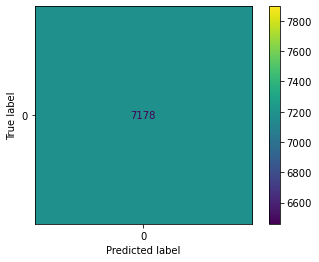

In [175]:
##Prediction

values = anndata.X
predict = model.predict(values)
label=[]

 #Obtaining list of predictions for each sample (probabilities for each class)
for p in predict: #list of probabilities for being malignant (1) or non-malignant (0) based on the model
    label.append(np.argmax(p)) #rounding list of probabilities to the predicted class (1 or 0)

        #Plot predictions
ConfusionMatrixDisplay.from_predictions(label,label)
plt.show()

In [46]:
%%notify
print("Finished!")

Finished!


<IPython.core.display.Javascript object>

In [176]:
##Save model predictions (tags)
disease = "MDS"

all_samples.index = gene_list #reset dataframe index to genes (not gene #)
out_data = all_samples.transpose() #flip the data to have the genes as columns)
predictions = pd.DataFrame(predict) #turn the array of predictions into a dataframe
predictions = predictions.rename({0: 'non_malignant', 1: 'malignant'}, axis=1) #name the columns for each prediction tag (prediction scores)
labels = pd.DataFrame(label) #turn the list of tags (0 or 1) into a dataframe
labels = labels.rename({0: 'predic_label'}, axis=1) #name the column with the tags "predic_label"
labels = labels.replace({1: disease, 0: 'non_malignant'}, regex=False) #change the 0s and 1s for actual tags (malignant and non_malignant)
print(Counter(labels.predic_label)) #print the counts for each predicted cell
cells = list(out_data.index) #turn the cell IDs into a list
labels.index = cells #in the dataframe with the prediction tags set the index to the cell IDs
final_file = pd.concat((out_data, labels), axis = 1) #concatenate the cell count file with the prediction column
final_file.to_csv(dir_predictions + "predictions_" + comb + "_" + disease + ".csv")

Counter({'non_malignant': 7178})


In [ ]:
AML_FA = pd.read_csv("E:/AML_project/DATASETS/predictions/separate/Nuevos_vGa_list/predictions_RvG_AML.csv")
AML_DC = pd.read_csv("E:/AML_project/DATASETS/predictions/separate/Nuevos_vGa_list/predictions_RGG_MDS.csv")
MDS_FA = pd.read_csv("E:/AML_project/DATASETS/predictions/separate/Nuevos_vGa_list/predictions_CovG_AML.csv")
MDS_DC = pd.read_csv("E:/AML_project/DATASETS/predictions/separate/Nuevos_vGa_list/predictions_CoGG_MDS.csv")
print(Counter(AML_FA.predic_label))
print(Counter(AML_DC.predic_label))
print(Counter(MDS_FA.predic_label))
print(Counter(MDS_DC.predic_label))